# Working with Notebooks

IPython notebooks are a interactive, browser based Python environment that allows you to mix code, documentation and output in a single visual display.

Notebook are saved as JSON files (version control friendly) and saved files includes all present output (including images, plots, etc.). This means that a saved notebook can be rendered by someone else, without having to run the code. This is a great way to share analysis results with co-workers or the outside world.

Incidentally, Github these days is capable of rendering notebook output, when a notbook is either pushed to a remote repository or when stored as a Github Gist. See here for an example: [E-mail list analysis example](https://gist.github.com/friso/32f6792cfb9aba0a82e6)

## Some things you can do in Notebooks

- Run Python code
- Show output
- Create plots
- Embed Markdown cells
- Embed HTML or other content
- Display images
- Create presentations
- Much, much more...

In [1]:
# Here's some Python code
def hello():
    return "Hello, World!"

In [2]:
# Since the above cell doesn't produce any output, nothing is shown.
# However, normally, the last expression in a cell will be considered the output of that cell.
hello()

'Hello, World!'

In [3]:
1 + 2

3

In [4]:
# Variable definitions (or anything else) are not scoped to cells
# So, x is also available in other cells after it's been declared
x = 1 + 41

In [5]:
x

42

## Some words on Python's data stack

Numerical computing in Python makes heavy use of a number of specialized libraries for data anlysis. These are:
- [Numpy](http://www.numpy.org), Python's numerical computing and math library
- [Scipy](http://www.scipy.org), extensions to Numpy, useful for scientific computing
- [Pandas](http://pandas.pydata.org), a data analysis library for Python
- [Scikit-learn](http://scikit-learn.org/stable/), a machine learning library for Python

What follows is a little example of what these can be used for. Let's not worry about this code too much for now, but it's an exampe of what can be achieved with relatively concise code.

In [6]:
# BTW: imports can be put anywhere in a notebook
import numpy as np
import pandas as pd

In [7]:
# Create two arrays, one with a range of contiguous numbers and
# one as a function of this range with some random noise added.

x = np.arange(0., 1000., 1.)
y = x * 42 + np.random.normal(0., 10., 1000)

In [8]:
# Now, create a DataFrame
df = pd.DataFrame({ 'x': x, 'y': y})

In [9]:
# We can show the 'head' of a data frame, to get an idea about the first couple of values
df.head(5)

,x,y
0,0,5.586819
1,1,49.112634
2,2,85.104987
3,3,129.667660
4,4,174.472917


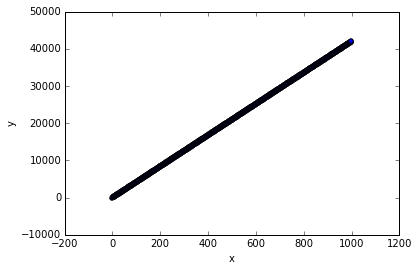

In [10]:
# We can also plot data frames
%matplotlib inline
df.plot(kind='scatter', x='x', y='y')

In [11]:
# Let's train a regression model on this data
# We'll try to predict y as function of x
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(df[['x']], df.y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [12]:
# We can inspect the model by asking for the coeficients:
clf.coef_

array([ 41.99893556])

In [13]:
# Let's ask the model for a prediction and look at the residuals
residuals = clf.predict(df[['x']]) - df.y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de072d0>]], dtype=object)

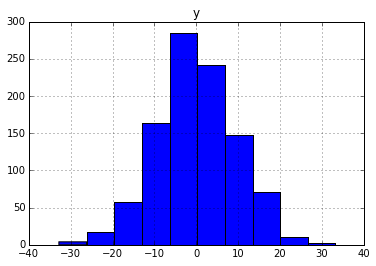

In [14]:
# Creating a new data frame out of the residuals,
# we can visualize if our residuals are normally distributed
pd.DataFrame(residuals).hist()

# Exercise: Notebooks

Create a scatter plot, showing a data set where the X axis values are drawn from a normal distribution and the Y axis values are drawn from a beta distribution with parameters of your choice.

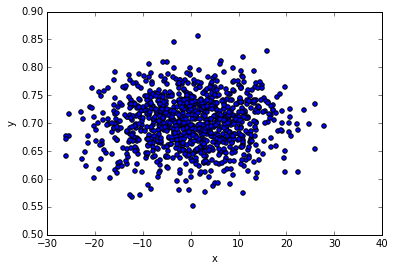

In [15]:
pd.DataFrame(
    {
        'x': np.random.normal(0., 10., 1000),
        'y': np.random.beta(70, 30, 1000)
    }
).plot(kind='scatter', x='x', y='y')